In [1]:
import pandas as pd

df = pd.read_excel("Cybersecurity_attacks.xlsx")

df.head()


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,Weekend,IsWeekend,Daypart
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server,6,1,0,Sabah
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall,7,2,0,Sabah
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,8,6,1,Sabah
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall,10,6,1,Sabah
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall,13,6,1,Öğle


In [2]:
df = pd.read_excel("Cybersecurity_attacks.xlsx")
df.head()


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,Weekend,IsWeekend,Daypart
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server,6,1,0,Sabah
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall,7,2,0,Sabah
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,8,6,1,Sabah
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall,10,6,1,Sabah
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall,13,6,1,Öğle


In [3]:
print("Columns:\n", df.columns)
print("\nShape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())


Columns:
 Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Hour', 'Weekend', 'IsWeekend', 'Daypart'],
      dtype='object')

Shape: (40000, 29)

Missing values:
 Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores             

Accuracy: 0.323625


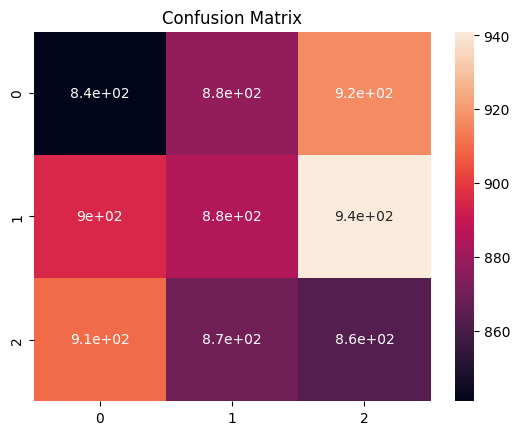

In [4]:
columns_to_drop = [
    "Timestamp",
    "Payload Data",
    "User Information",
    "Device Information",
    "Geo-location Data",
    "Proxy Information",
    "Firewall Logs",
    "IDS/IPS Alerts",
    "Attack Signature"
]

df = df.drop(columns=columns_to_drop)

df.head()
df = df.drop(columns=[
    "Malware Indicators",
    "Alerts/Warnings"
])

df.isnull().sum()
df = df.drop(columns=[
    "Source IP Address",
    "Destination IP Address"
])
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop("Attack Type", axis=1)
y = df["Attack Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()


In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_s, y_train_s)

y_pred_lr = lr.predict(X_test_s)

print("Logistic Regression Accuracy:", accuracy_score(y_test_s, y_pred_lr))


Random Forest Accuracy: 0.338125
Logistic Regression Accuracy: 0.3325


In [6]:
df["Attack Type"].value_counts(normalize=True)


,proportion
Attack Type,
0,0.335700
2,0.332675
1,0.331625


In [7]:
# Unique değerleri görelim
print(df["Attack Type"].unique())


[2 0 1]


In [8]:
# Örnek: eğer 0,1,2 varsa
df["Attack Type"] = df["Attack Type"].apply(lambda x: 0 if x == 0 else 1)
X = df.drop("Attack Type", axis=1)
y = df["Attack Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Binary RF Accuracy:", accuracy_score(y_test, y_pred))


Binary RF Accuracy: 0.661125


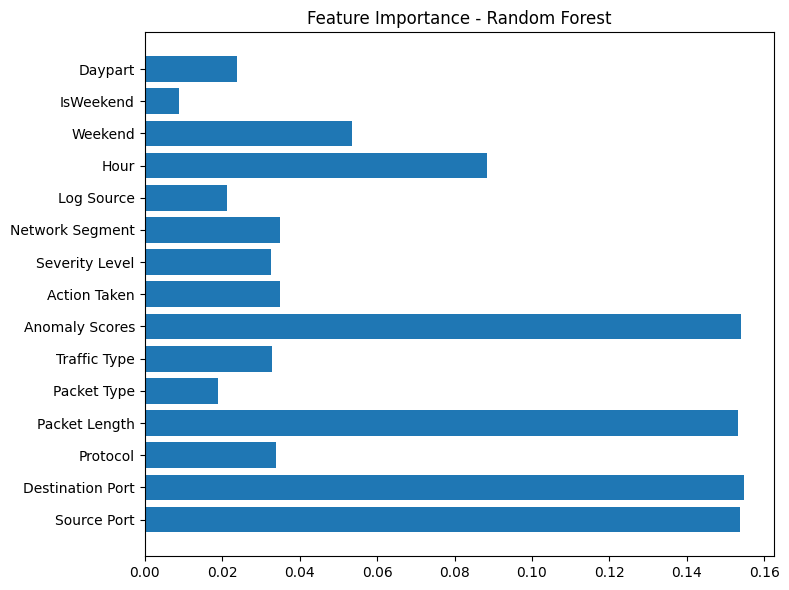

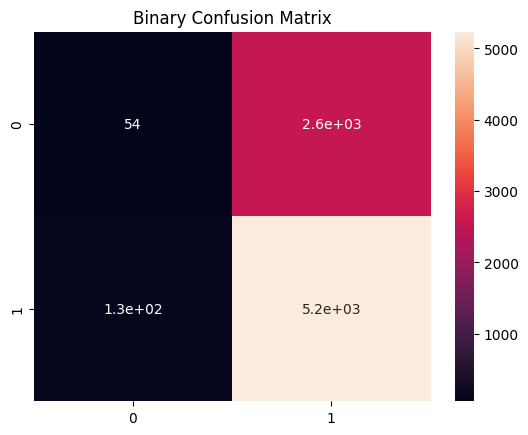

In [9]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,6))
plt.barh(features, importances)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True)
plt.title("Binary Confusion Matrix")
plt.savefig("binary_confusion_matrix.png")
plt.show()
